# Loading the dataset




In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# proprocess the data

In [2]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [3]:
import numpy as np
noise_factor = 0.25
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [4]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = tf.keras.Sequential(
    [
        Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        
        Flatten(),
        
        Dense(128, activation=tf.nn.relu),
        Dropout(0.5),
        Dense(10, activation=tf.nn.softmax),
    ]
)

model.summary()


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
____

In [5]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train_noisy,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 47s 784us/sample - loss: 1.1881 - acc: 0.5958
Epoch 2/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.8893 - acc: 0.7054
Epoch 3/10
60000/60000 [==============================] - 15s 255us/sample - loss: 0.8227 - acc: 0.7297 - loss:
Epoch 4/10
60000/60000 [==============================] - 14s 238us/sample - loss: 0.7904 - acc: 0.7412 - lo - ETA: 6s -
Epoch 5/10
60000/60000 [==============================] - 15s 243us/sample - loss: 0.7584 - acc: 0.7496
Epoch 6/10
60000/60000 [==============================] - 14s 238us/sample - loss: 0.7357 - acc: 0.7575
Epoch 7/10
60000/60000 [==============================] - 15s 247us/sample - loss: 0.7150 - acc: 0.7646
Epoch 8/10
60000/60000 [==============================] - 15s 242us/sample - loss: 0.7003 - acc: 0.7693
Epoch 9/10
60000/60000 [==============================] - 15s 245us/sample - loss: 0.6884 - acc: 0.7713 - loss: 0.6890 - ac
Epoch 10/10
60000/6

In [6]:
score = model.evaluate(x_test_noisy, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.5927135842323303
Test accuracy: 0.8065


In [7]:
import matplotlib.pyplot as plt
image_index = 4443
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

3


In [10]:
history = model.fit(x=x_train_noisy,y=y_train, epochs=10,validation_data=(x_test_noisy, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 262us/sample - loss: 0.6020 - acc: 0.7976 - val_loss: 0.6077 - val_acc: 0.8029
Epoch 2/10
60000/60000 [==============================] - 15s 256us/sample - loss: 0.5890 - acc: 0.8017 - val_loss: 0.6039 - val_acc: 0.8003
Epoch 3/10
60000/60000 [==============================] - 16s 262us/sample - loss: 0.5790 - acc: 0.8041 - val_loss: 0.6281 - val_acc: 0.7942
Epoch 4/10
60000/60000 [==============================] - 16s 272us/sample - loss: 0.5675 - acc: 0.8072 - val_loss: 0.6183 - val_acc: 0.7957
Epoch 5/10
60000/60000 [==============================] - 17s 280us/sample - loss: 0.5602 - acc: 0.8110 - val_loss: 0.6117 - val_acc: 0.8010
Epoch 6/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.5527 - acc: 0.8116 - val_loss: 0.6174 - val_acc: 0.8028
Epoch 7/10
60000/60000 [==============================] - 16s 261us/sample - loss: 0.5415 - acc: 0.8147 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


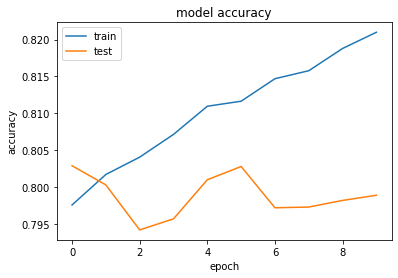

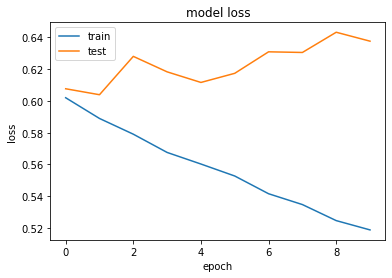

In [13]:

import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()